In [1]:
import pandas as pd

In [2]:
results = pd.read_csv('results.csv')

In [3]:
results['minority_size'].value_counts()

90.0    90
80.0    90
70.0    90
60.0    90
50.0    90
5.0     90
40.0    90
30.0    90
20.0    90
2.0     90
10.0    90
0.5     90
1.0     90
Name: minority_size, dtype: int64

In [4]:
results.columns

Index(['minority_size', 'strategy', 'threshold', 'tp', 'fp', 'tn', 'fn', 'tpr',
       'tnr', 'roc_auc', 'geometric_mean', 'arithmetic_mean', 'f1_score',
       'precision'],
      dtype='object')

In [5]:
data = results.loc[results['strategy'].isin(['optimal', 'theoretical', 'default'])]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [8]:
plt.style.use(['ggplot', 'seaborn-poster'])

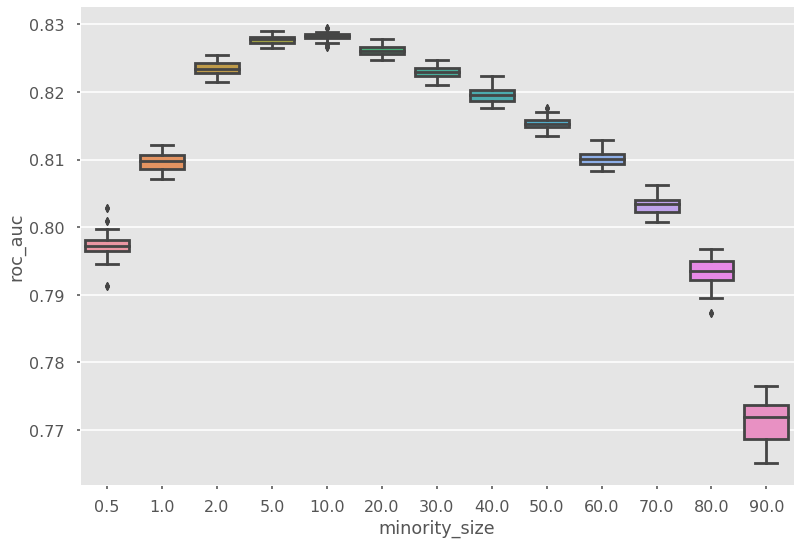

In [9]:
sns.boxplot(x='minority_size', y='roc_auc', data=data)

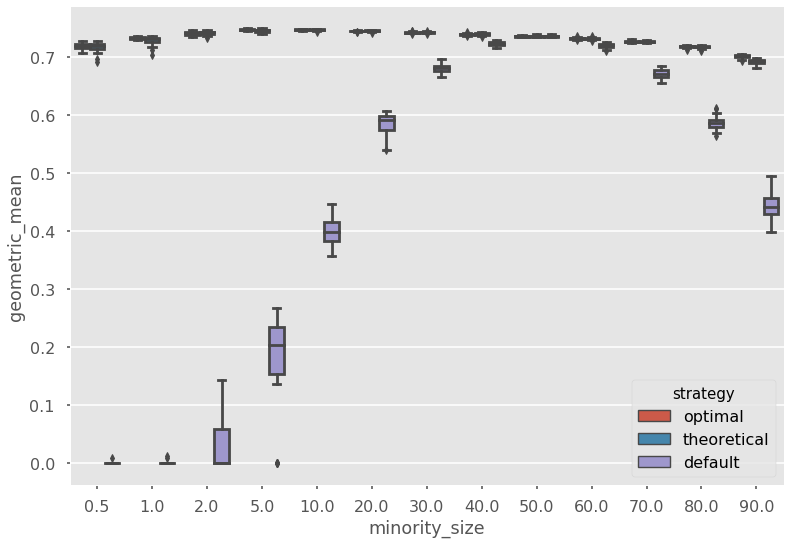

In [10]:
sns.boxplot(x='minority_size', y='geometric_mean', hue='strategy', data=data)

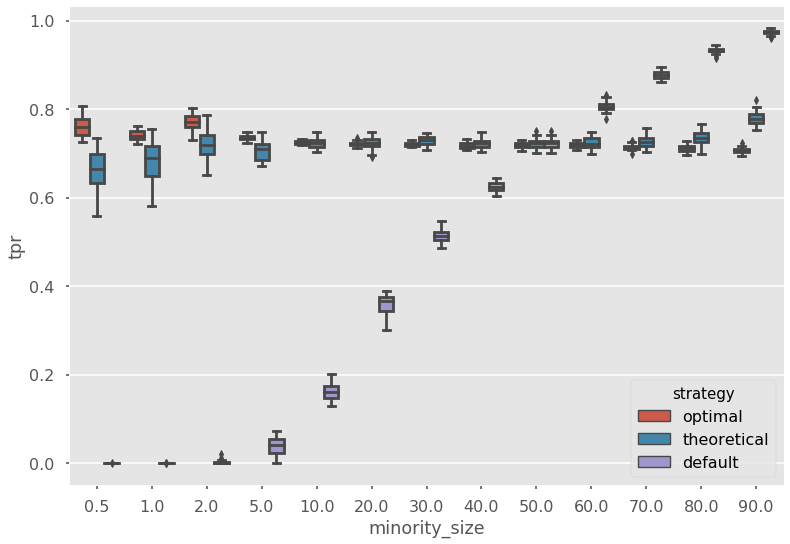

In [11]:
sns.boxplot(x='minority_size', y='tpr', hue='strategy', data=data)

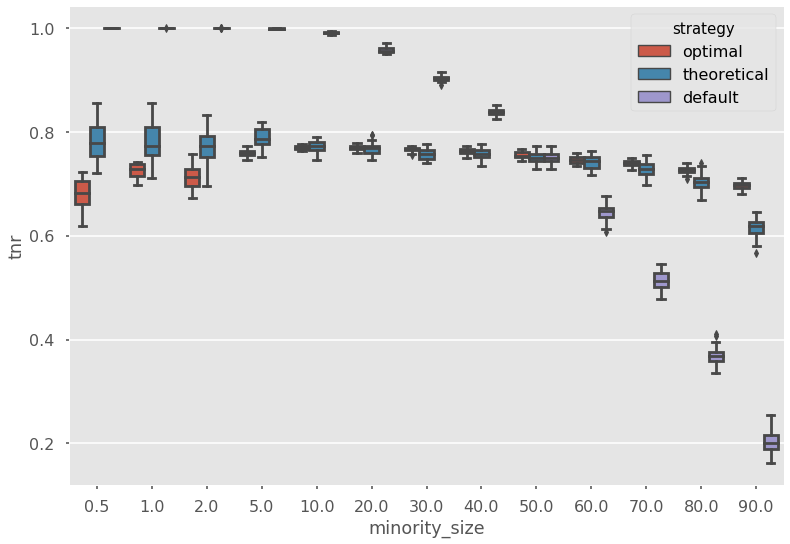

In [12]:
sns.boxplot(x='minority_size', y='tnr', hue='strategy', data=data)

In [13]:
data['minority_size_label'] = data['minority_size'].astype(str)

In [14]:
data.head()

,minority_size,strategy,threshold,tp,fp,tn,fn,tpr,tnr,roc_auc,geometric_mean,arithmetic_mean,f1_score,precision,minority_size_label
0,1.0,optimal,0.010,11256,193696,491287,3761,0.749551,0.717225,0.809787,0.733210,0.733388,0.102342,0.054920,1.0
1,1.0,theoretical,0.010,11256,193696,491287,3761,0.749551,0.717225,0.809787,0.733210,0.733388,0.102342,0.054920,1.0
2,1.0,default,0.500,0,0,684983,15017,0.000000,1.000000,0.809787,0.000000,0.500000,0.000000,0.000000,1.0
3,0.5,optimal,0.003,11386,215285,469698,3631,0.758207,0.685708,0.797226,0.721047,0.721957,0.094221,0.050231,0.5
4,0.5,theoretical,0.005,9064,116142,568841,5953,0.603583,0.830445,0.797226,0.707985,0.717014,0.129280,0.072393,0.5


In [15]:
agged = data.groupby(['minority_size', 'strategy']).mean()

In [16]:
agged.reset_index(inplace=True)

In [17]:
agged

,minority_size,strategy,threshold,tp,fp,tn,fn,tpr,tnr,roc_auc,geometric_mean,arithmetic_mean,f1_score,precision
0,0.5,default,0.500000,0.033333,0.000000,684983.000000,15016.966667,0.000002,1.000000,0.797315,0.000272,0.500001,0.000004,0.033333
1,0.5,optimal,0.003533,11438.900000,218731.566667,466251.433333,3578.100000,0.761730,0.680676,0.797315,0.719633,0.721203,0.093680,0.049931
2,0.5,theoretical,0.005000,9928.400000,148903.266667,536079.733333,5088.600000,0.661144,0.782618,0.797315,0.718196,0.721881,0.115645,0.063525
3,1.0,default,0.500000,0.100000,0.033333,684982.966667,15016.900000,0.000007,1.000000,0.809675,0.000657,0.500003,0.000013,0.050000
4,1.0,optimal,0.008367,11112.333333,187390.600000,497592.400000,3904.666667,0.739984,0.726430,0.809675,0.733076,0.733207,0.104209,0.056059
5,1.0,theoretical,0.010000,10267.100000,151582.700000,533400.300000,4749.900000,0.683699,0.778706,0.809675,0.728495,0.731202,0.117672,0.064543
6,2.0,default,0.500000,34.700000,18.966667,684964.033333,14982.300000,0.002311,0.999972,0.823512,0.027977,0.501142,0.004542,0.325791
7,2.0,optimal,0.016667,11554.133333,195490.600000,489492.400000,3462.866667,0.769404,0.714605,0.823512,0.741175,0.742004,0.104460,0.056060
8,2.0,theoretical,0.020000,10814.633333,159641.166667,525341.833333,4202.366667,0.720159,0.766941,0.823512,0.742385,0.743550,0.117859,0.064286
9,5.0,default,0.500000,556.300000,625.866667,684357.133333,14460.700000,0.037045,0.999086,0.827753,0.169745,0.518065,0.066811,0.389831


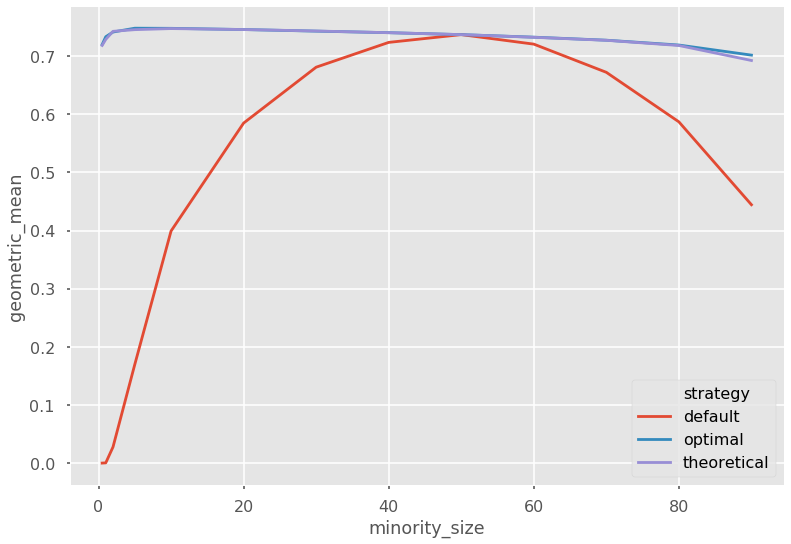

In [18]:
sns.lineplot(data=agged, x='minority_size', y='geometric_mean', hue='strategy', estimator=None)

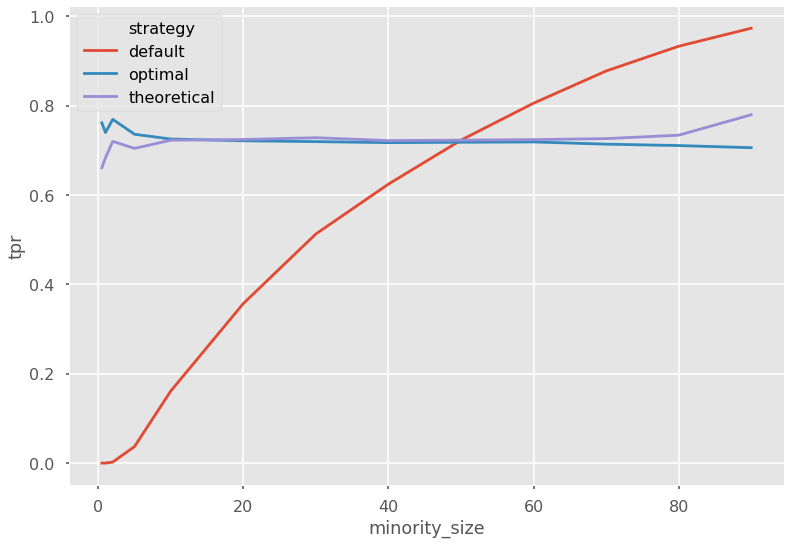

In [19]:
sns.lineplot(data=agged, x='minority_size', y='tpr', hue='strategy', estimator=None)

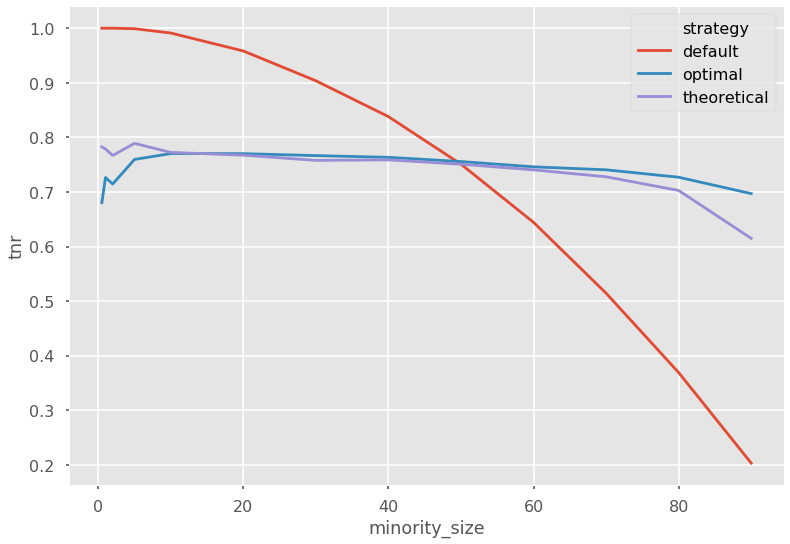

In [20]:
sns.lineplot(data=agged, x='minority_size', y='tnr', hue='strategy', estimator=None)

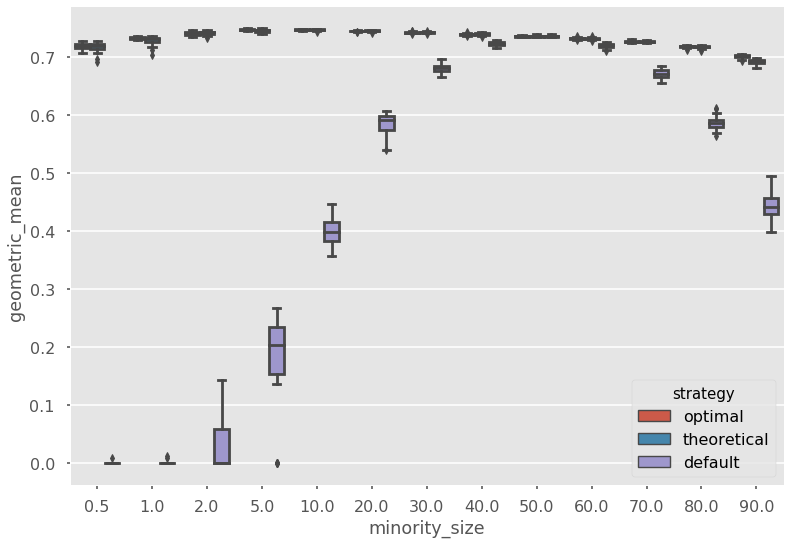

In [21]:
sns.boxplot(data=data, x='minority_size', y='geometric_mean', hue='strategy')

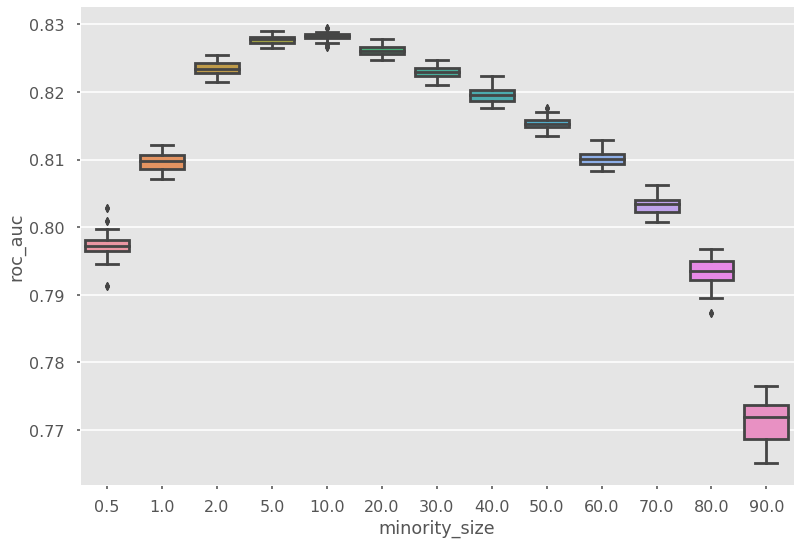

In [22]:
sns.boxplot(data=data, x='minority_size', y='roc_auc')

In [23]:
from matplotlib.patches import Patch


In [24]:
plt.rcParams.clear()

plt.style.use(['seaborn-poster', 'ggplot', 'seaborn-whitegrid'])

params = {
    'figure.titlesize': 20,
    'figure.figsize': (18, 8),
    'legend.fontsize': 16,
}
plt.rcParams.update(params)

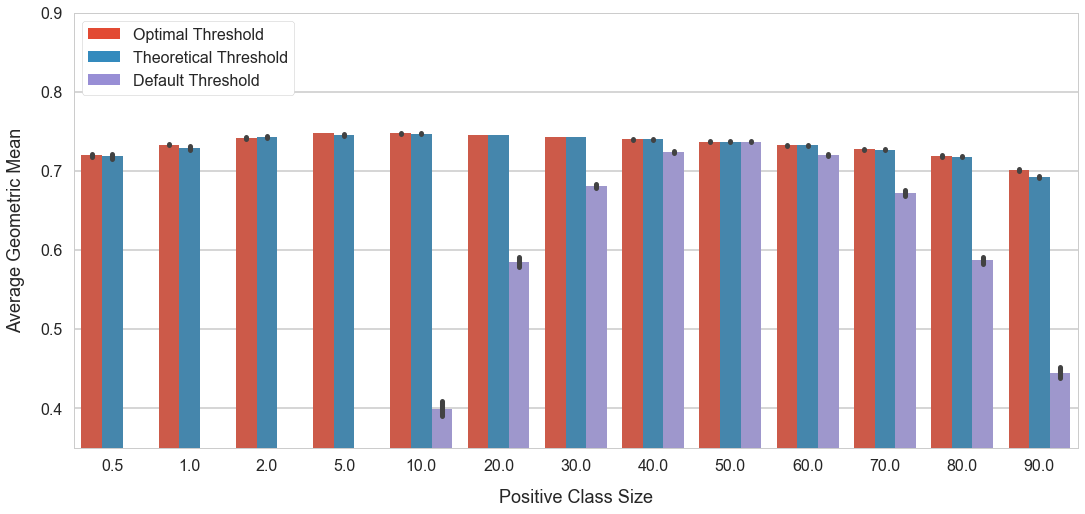

In [26]:
legend = [
    Patch(facecolor="#E24A33", label="Optimal Threshold"),
    Patch(facecolor="#348ABD", label="Theoretical Threshold"),
    Patch(facecolor="#988ED5", label="Default Threshold"),
]

g = sns.barplot(data=data, x='minority_size', y='geometric_mean', hue='strategy')

plt.legend(handles=legend, loc='upper left', frameon=True, framealpha=1)
plt.ylim(0.35, 0.9)
# plt.title('Geometric Mean', fontsize=20)
plt.xlabel('Positive Class Size', labelpad=15, fontsize=18)
plt.ylabel('Average Geometric Mean', labelpad=15, fontsize=18)

g.get_figure().savefig('ecbdl14-threshold-gmean-comparison.png')

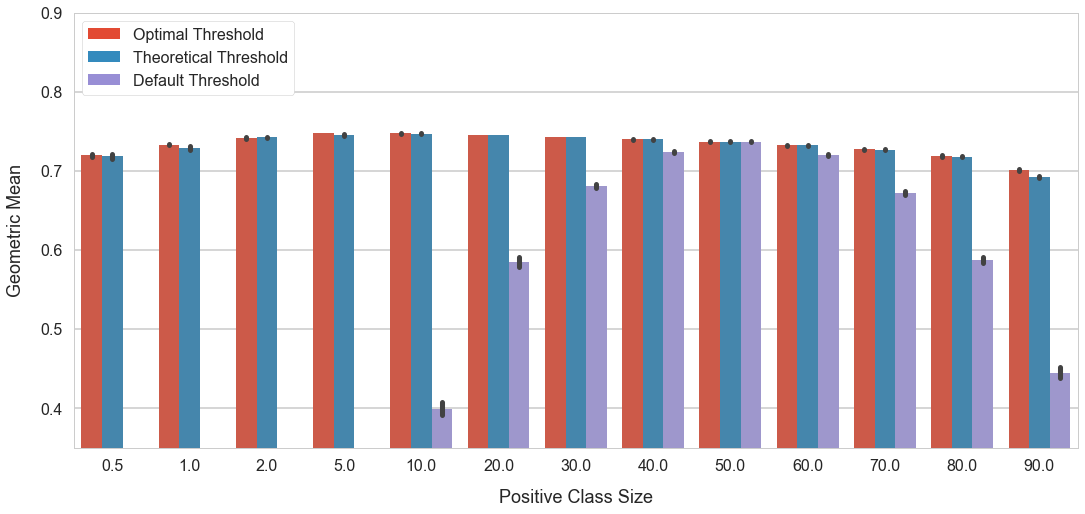

In [34]:
g = sns.barplot(data=data, x='minority_size', y='geometric_mean', hue='strategy')

plt.legend(handles=legend, loc='upper left', frameon=True, framealpha=1)
plt.ylim(0.35, 0.9)
# plt.title('Geometric Mean', fontsize=20)
plt.xlabel('Positive Class Size', labelpad=15, fontsize=18)
plt.ylabel('Geometric Mean', labelpad=15, fontsize=18)

g.get_figure().savefig('ecbdl14-threshold-gmean-comparison.png')